In [10]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import time
from matplotlib import cm
from astropy.io import fits
from astropy.wcs import WCS

### 1. Integral Processes: MC Edition (Optional but recommended!)
Revisit HW1 problem 2a. Numerically integrate the function using the MC approach we
discussed in class, i.e., instead of using equally spaced points to evaluate the integral, use
points randomly drawn from the integral [1,5].
$$
\int_1^5 \frac{1}{x^{3/2}}dx
$$
Which approach do you like better? Why?

In [11]:
def gen_rand(N, seed=2753, xmin=0, xmax=1, get_seed=False):
    """
    Randomly generates N numbers between xmin and xmax for a given seed
    
    Parameters
    ----------
    N : integer 
        number of random numbers to generate
    seed : float, default = 2753
        seed for random number generator
    xmin : float, default = 0 
        minumum random number generated
    xmax : float, default = 1 
        maximum random number
    get_seed : bool, default=False
        whether to return the last seed value
    Returns
    ----------
    results : array
        array of N random numbers between xmin and xmax
    """
    a = 1541829584 
    c = 2958760257354
    m = 5206398799235
    results = []
    for i in range(N):
        seed = (a*seed+c)%m
        rand = seed/m*(xmax-xmin)+xmin
        results.append(rand)
    
    results = np.array(results)
    
    if get_seed:
        return results, seed
    return results

def MC_integration(func, xmin, xmax, N):
    """
    Calculates the integral of a function using the Monte-Carlo approach
    Parameters
    ----------
    func : function
        function to evaluate the integral of
    xmin : float
        lower limit of integral
    xmax : float
        upper limit of integral
    N : integer 
        number of steps

    Returns
    ----------
    I : float
        value of integral
    """
    
    rand_arr = gen_rand(N, xmin, xmax)
    sampled = func(rand_arr)
    I = (xmax-xmin)/N * np.sum(sampled)
    return I
    
def integrand(x):
    return x**(-3./2)

def calc_frac_err(Ieval, Iexact):
    """
    Calculates the fractional error given exact and estimated value
    """
    return abs(Ieval-Iexact)/Iexact

In [12]:
N = 1649
Iexact = -2./np.sqrt(5)+2
Ieval = MC_integration(integrand, 1, 5, N)

frac_err = calc_frac_err(Ieval, Iexact)
print("""the value of the integral evaluated using the MC approach with {} steps is {}. This has a 
fractionl error of {}.""".format(N, Ieval, frac_err))

the value of the integral evaluated using the MC approach with 1649 steps is 1.0990634699456479. This has a 
fractionl error of 0.005887752485812001.


From HW1, we know that evaluating this integral using the rectangle rule will give us a fractional error of <1e-3 with ~1649 equally spaced steps, and only ~43 steps are needed using the slightly more sophisticated trapezoidal rule. Using the MC approach of integration gives us a fractional error of ~6 times that of the rectangle rule in the same amount of steps. Given this, I prefer calculating the integral using the trapezoidal rule as it seems far more accurate than using random points. This make sense since by drawing random points, we know that we may not be sampling the entire distribution equally and there is a small chance that we are over sampling one region and missing another.

### 2. A random stroll from the center of the Sun
Photons created by nuclear fusion at the Sun’s center do not simply escape or “free-stream”
outwards. Instead, they take a significant amount of time to get out due to the high proba-
bility of scattering (owing to the relatively large Thomson cross section for scattering), i.e.,
they take a random walk.
Assume the typical mean free path of a photon is $l \simeq 4\textrm{x}10^{-1} $cm. Let’s consider a theorist’s
sun, which is a 2 dimensional circle with radius $1R_\odot$ . Every time a photon hits an electron
(after going 1 mean free path), it is scattered in an arbitrary direction $\theta$. Roughly how long
does it take for a photon to escape the Sun after being emitted? (You can round to the
nearest power of 10).
Use your own random number generate (e.g., like the one we discussed in class) to complete
the Monte Carlo. If you are curious, compare this to one of the built in “black boxes” in
Python.
Note, you might find this problem simplest to do in spherical coordinates where:
$$
x =r\textrm{cos}\theta \\
y =r\textrm{sin}\theta
$$
but you are welcome to do this in Cartesian coordinates as well. Note, you cannot do this
problem by using the actual solar radius – your code will never finish. So, assume a solar
radius of 7 cm and see what you get. Then assume a solar radius of 70 cm. Extrapolate
accordingly...

Use a timer function to figure out how long the “walk clock time” for your code is, i.e., how
long do you have to wait for your code to finish. What general lessons do you learn from
this exercise?


--- Random walk time is 0.0010929107666015625 seconds ---
time it takes a photo to escape a radius of 7.0cm: 2.2266666666666623e-09s


Text(0.5, 1.0, 'Random walk to escape R=7.0cm')

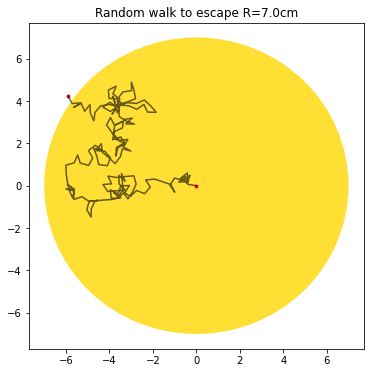

In [17]:
l = 4e-1
R1 = 7.

# initialize, photon is at the center of the "Sun
x = 0.
y = 0.
r_photon = 0
d_tot1=0
x_full, y_full = [x], [y]
start_time = time.time()
seed = 124623
while (r_photon < R1):    #stop looping when photon is at radius R
    theta, seed = gen_rand(1, seed=seed, xmin=0, xmax=2*np.pi, get_seed = True)
    x = x+l*np.cos(theta[0])
    y = y+l*np.sin(theta[0])
    r_photon = np.sqrt(x**2+y**2)
    x_full.append(x)
    y_full.append(y)
    d_tot1 = d_tot1+l

walk_time = time.time() - start_time
print("--- Random walk time is %s seconds ---" % (walk_time))
print("time it takes a photo to escape a radius of {}cm: {}s".format(R1, d_tot1/3e10))
#Visualize random walk
fig, ax = plt.subplots(figsize=(6, 6))

sun = patches.Circle((0,0), R1, alpha=0.8, fc='gold', zorder = -20)
ax.add_patch(sun)
ax.plot(x_full, y_full, alpha=0.6, color='k')

ax.scatter(x_full[0], y_full[0], color = 'red', s=8)
ax.scatter(x_full[-1], y_full[-1], color = 'red', s=8)
ax.set_title("Random walk to escape R={}cm".format(R1))

--- Random walk time is 0.18723464012145996 seconds ---
time it takes a photo to escape a radius of 70.0cm: 4.0998666666643987e-07s


Text(0.5, 1.0, 'Random walk to escape R=70.0cm')

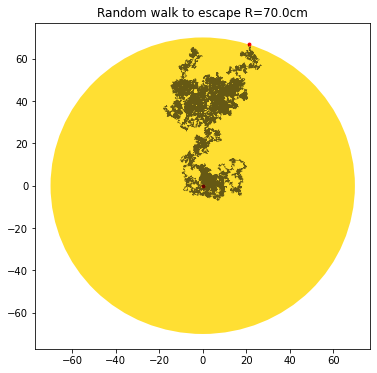

In [49]:
l = 4e-1
R2 = 70.

# initialize, photon is at the center of the "Sun
x = 0.
y = 0.
r_photon = 0
x_full=[]
y_full=[]
d_tot2=0
start_time = time.time()
while (r_photon < R2):    #stop looping when photon is at radius R
    theta, seed = gen_rand(1, seed=seed, xmin=0, xmax=2*np.pi, get_seed = True)
    x = x+l*np.cos(theta[0])
    y = y+l*np.sin(theta[0])
    r_photon = np.sqrt(x**2+y**2)
    x_full.append(x)
    y_full.append(y)
    d_tot2 = d_tot2+l
    
walk_time2 = time.time() - start_time
print("--- Random walk time is %s seconds ---" % (walk_time2))
print("time it takes a photo to escape a radius of {}cm: {}s".format(R2, d_tot2/3e10))

#Visualize random walk
fig, ax = plt.subplots(figsize=(6, 6))

sun = patches.Circle((0,0), R2, alpha=0.8, fc='gold', zorder=-20)
ax.add_patch(sun)
ax.plot(x_full, y_full, alpha=0.6, lw=0.5, color='k')
ax.scatter(x_full[0], y_full[0], color = 'red', s=8)
ax.scatter(x_full[-1], y_full[-1], color = 'red', s=8)
ax.set_title("Random walk to escape R={}cm".format(R2))

In [50]:
#Linear fit based on how long it takes to randomly walk 7 and 70cm
sys_m, sys_intercept = np.polyfit([R1, R2], [walk_time, walk_time2], 1)
R_sun = 7e10
sys_walk_time_sun = sys_m*R_sun+sys_intercept
print("""Extrapolating, it will take {}s to model a photon escaping the Sun, which is approximately {}
years""".format(int(sys_walk_time_sun), int(sys_walk_time_sun/(np.pi*1e7))))


Extrapolating, it will take 206824143s to model a photon escaping the Sun, which is approximately 6
years


Based on the results, a increase of 10 times in radius gives an increase of 100 times for photon escape time (this changes from run-to-run as the random walk also varies, however is a good aproximation). Therefore we can extrapolate that an increase of $10^{10}$ in the radius (i.e. from 7cm $ \rightarrow R_\odot$) will increase the time by $(10^{10})^2$. So it will take a photon $1.19 \times 10^{-9} * 10^{20} = 1.19 \times 10^{11}$s, or about 3790 years to escape the Sun.

### 3. Observing Dusty Protostars
Now, we will consider a more realistic setup of radiation propagating through a 3D asymmetric gas distribution. In this problem you will use the radiative transfer code, Hyperion,
to model an embedded low-mass protostar. Download and install Hyperion from here:
http://www.hyperion-rt.org. I suggest perusing Robitaille (2011) to get a sense for how
the code works and what sorts of problems it can do.

a) Search through the code and documentation and determine how and where random numbers are being used in Hyperion (in particular focus on the core algorithm and physics and
ignore random numbers appearing in test problems, i.e., the tests directory, and documentation, i.e., the docs directory, although these can explain what is happening). Where and why
are they invoked? What generation method is being used? For a given run with identical
parameters will the results be deterministic? If you’re not sure you can check!

In [4]:
import hyperion
from hyperion.util.constants import *
from hyperion.model import AnalyticalYSOModel
from hyperion.model import ModelOutput 

b) Use the documentation example for setting up “Analytical YSO Models” to initialize a
model of a star with envelope and disk with the following properties:

• YSO: $L = 5L_\odot$ , $R = 2R_\odot$ , $T = 6200$ K

• Flared Disk: $M_d = 0.01M_\odot$ ,$ R_{d,min} = 10R_\odot$ , $R_{d,max} = 200$ au, $\rho \propto r^{−1}$ and flaring power $\beta = 1.25$

• Envelope: $M_e = 0.4M_\odot$ , $R_{e,min} = 200$ au, $R_{e,max} = 10^4$ au, $\rho \propto r^{−2}$

• Dust Model for all: Kim, Martin & Hendry 1994

• Spherical grid: 200 x 100 x 5

(For any properties not specified you can use the defaults). I suggest starting with 10,000
photons (initial, imaging and raytracing). Make a plot showing the SEDs of this source
viewed from several different angles, assuming a distance of 300 pc. Explain any features of
the SED. How does the SED change with viewing angle and why?

In [ ]:
m = AnalyticalYSOModel()

# Set the stellar parameters------------------------------------
m.star.radius = 2. * rsun
m.star.temperature = 6200.
m.star.luminosity = 5*lsun
# Add a flared disk---------------------------------------------
disk = m.add_flared_disk()
disk.mass = 0.01 * msun
disk.rmin = 10 * m.star.radius
disk.rmax = 200 * au
disk.r_0 = m.star.radius
disk.h_0 = 0.01 * disk.r_0
disk.p = -1.0
disk.beta = 1.25
disk.dust = 'kmh_lite.hdf5'
# Add a powerlaw envelope---------------------------------------
envelope = m.add_power_law_envelope()
envelope.mass = 0.4 * msun          # Envelope mass
envelope.rmin = 200 * au                  # Inner radius
envelope.rmax = 10000 * au          # Outer radius
envelope.power = -2                 # Radial power
envelope.r_0 = disk.rmax

envelope.dust = 'kmh_lite.hdf5'

# Use raytracing to improve s/n of thermal/source emission
m.set_raytracing(True)

# Use the modified random walk
m.set_mrw(True, gamma=2.)
# Set up grid
m.set_spherical_polar_grid_auto(200, 100, 5)

sed = m.add_peeled_images(sed=True, image=False)
sed.set_viewing_angles(np.linspace(0., 90., 10), np.repeat(45., 10))
sed.set_wavelength_range(150, 0.02, 2000.)

# Set number of photons
m.set_n_photons(initial=1e4, imaging=1e4,
                raytracing_sources=1e4, raytracing_dust=1e4)
# Set number of temperature iterations
m.set_n_initial_iterations(5)
m.set_convergence(True, percentile=99.0, absolute=2.0, relative=1.1)

# Write out file
m.write('test_sed.rtin', overwrite=True)
m.run('test_sed.rtout', overwrite=True)


/home/katherine/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:23: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.


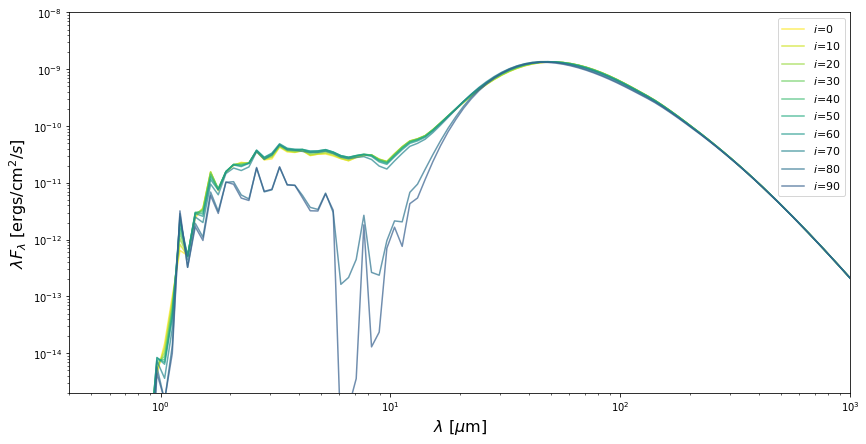

In [51]:
fs = 16
mo = ModelOutput('test_sed.rtout')
sed = mo.get_sed(aperture=-1, distance=300. * pc)

fig = plt.figure(figsize=(14, 7))
ax = fig.add_subplot(1, 1, 1)

colors=iter(cm.viridis(np.linspace(1,0.3,10)))

for view in range(10):
    c = next(colors)
    los = ax.loglog(sed.wav, sed.val[view], color = c, alpha= 0.7)

labels = []
for theta in np.linspace(0., 90., 10):
    labels.append(r'$i$='+str(int(theta)))

ax.set_xlim(4e-1, 1e3)
ax.set_ylim(2e-15, 1e-8)
ax.set_xlabel(r'$\lambda$ [$\mu$m]', fontsize = fs)
ax.set_ylabel(r'$\lambda F_\lambda$ [ergs/cm$^2/s$]', fontsize = fs)
fig.savefig('test_sed.png', bbox_inches='tight')
ax.legend(los, labels=labels, fontsize = fs-5)

Based on the above plot, we can see that the SED at $i$ = 90 is different than at lower angles.  $i$ = 90 corresponds to viewing the YSO edge on. For all viewing angles, we see a long-wavelenght hump, indicitive of thermal emission. The dip in the SED at higher inclination is due to the scattering by the disk. At the short-wavelength end (i.e. ~1 micron to 10 micron) the lowering scattering albedo allows less scattered light, as we go above ~10 micron, the increasing extinction as wavelength decreases from ~100 to 10 microns allows less thermal emission to escape. As we view the YSO more face on, we no longer see the effects of the disk as it is not in our line of sight, therefore the SEDs at lower inclination look nearly identical to one another.

c) Vary the number of photon packets and grid resolution. How many photons and what
resolution would you need to produce a converged SED? Describe your convergence criteria
and make a plot showing the dependence of the SED on different values.

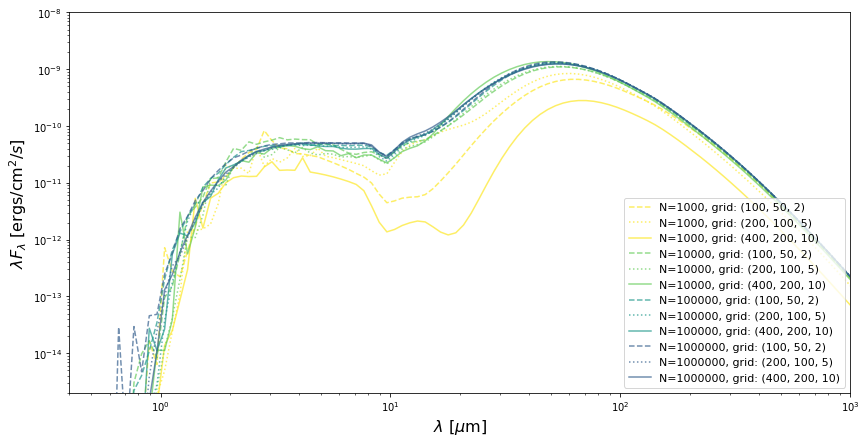

In [41]:
### run using python script hyperion_c.py
### n_photons varied between 1e3, 1e4, 1e5, 1e6
### with grid sizes (100, 50, 2), (200, 100, 5), and (400, 200, 10)
#----------------------------------------------------------------------------------------
fs = 16
photons = [1e3, 1e4, 1e5, 1e6]
grids = [0,1,2]
gridnames = [(100, 50, 2), (200, 100, 5), (400, 200, 10)]
colors=iter(cm.viridis(np.linspace(1,0.3,4)))
linestyles=['--', ':', '-']    

fig = plt.figure(figsize=(14, 7))
ax = fig.add_subplot(1, 1, 1)

for photon_num in photons:
    c = next(colors)
    for grid in grids:
        ls = linestyles[grid]
        model = ModelOutput('N{}grid{}.rtout'.format(photon_num, str(grid)))
        sed = model.get_sed(aperture=-1, distance=300. * pc)

        los = ax.loglog(sed.wav, sed.val[0], color = c, alpha= 0.7, linestyle = ls, 
                        label='N={}, grid: {}'.format(int(photon_num), gridnames[grid]))


ax.set_xlim(4e-1, 1e3)
ax.set_ylim(2e-15, 1e-8)
ax.set_xlabel(r'$\lambda$ [$\mu$m]', fontsize = fs)
ax.set_ylabel(r'$\lambda F_\lambda$ [ergs/cm$^2/s$]', fontsize = fs)
fig.savefig('test_sed.png', bbox_inches='tight')
ax.legend(fontsize = fs-5, loc='lower right')

My convergence criteria is `m.set_convergence(True, percentile=99.0, absolute=2.0, relative=1.1)`. This means that convergence is achieved once 99.9% of the differences in specific energy absorption rates between iterations are less than a factor of 2, and once the 99.9% percentile value of the difference changes by less than a factor of 1.1 (∼10%).
Based on this plot, it seems like in order to produced a converged SED, ~1e4-1e5 photons are needed. We can also see that by using a finer grid (400, 200, 10) we remove some of the coarseness and peaky features in the SED and recover a smoother SED.